In [22]:
from core import (create_stat_table,
                  make_full_analyses_anomalies,
                  process_data,
                  region_to_district)


import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint
import seaborn as sns
import sqlite3

In [23]:
conn = sqlite3.connect('data.db')
query = """SELECT * FROM population_data
UNION ALL SELECT * FROM mort_cancer"""
with conn:
    df = pd.read_sql_query(query, conn)

2024-03-01 18:35:53,444 - INFO - первое представление о данных


,id,reason,region,table_name,effectif_total_all,indice_gros_all,indice_standart_all,indice_error_all,effectif_total_men,indice_gros_men,indice_standart_men,indice_error_men,effectif_total_femme,indice_gros_femme,indice_standart_femme,indice_error_femme,district
0,1,заболеваемость,РОССИЯ,Злокачественные новообразования - всего (С00-96),580415,397.91,224.87,0.32,265039.0,391.20,255.54,0.51,315376.0,403.74,213.58,0.42,NaN
1,2,заболеваемость,ЦЕНТРАЛЬНЫЙ ФО,Злокачественные новообразования - всего (С00-96),148613,379.33,201.37,0.57,66290.0,367.57,221.68,0.89,82323.0,389.36,195.39,0.78,NaN
2,3,заболеваемость,Белгородская область,Злокачественные новообразования - всего (С00-96),7037,457.96,245.09,3.16,3290.0,462.62,275.97,4.99,3747.0,453.95,234.58,4.33,ЦЕНТРАЛЬНЫЙ ФО
3,4,заболеваемость,Брянская область,Злокачественные новообразования - всего (С00-96),6019,511.94,275.83,3.90,2802.0,520.43,323.50,6.37,3217.0,504.76,257.06,5.23,ЦЕНТРАЛЬНЫЙ ФО
4,5,заболеваемость,Владимирская область,Злокачественные новообразования - всего (С00-96),6162,462.31,236.89,3.29,2752.0,453.85,276.80,5.41,3410.0,469.37,226.49,4.53,ЦЕНТРАЛЬНЫЙ ФО


****************************************************************************************************


,id,effectif_total_all,indice_gros_all,indice_standart_all,indice_error_all,effectif_total_men,indice_gros_men,indice_standart_men,indice_error_men,effectif_total_femme,indice_gros_femme,indice_standart_femme,indice_error_femme
count,7788.000000,7.788000e+03,7788.000000,7788.000000,7788.000000,6.486000e+03,7788.000000,7788.000000,7788.000000,6.486000e+03,7788.000000,7788.000000,7788.000000
mean,1995.278634,1.590261e+03,35.406441,19.028042,0.655773,8.967037e+02,34.797018,23.669488,0.899034,9.712405e+02,31.953003,13.900137,0.591229
std,1203.144210,3.122739e+04,191.668984,97.083910,1.391123,1.625154e+04,198.267547,134.355196,2.506117,1.798593e+04,187.168592,72.359944,1.587817
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,974.000000,1.300000e+01,1.170000,0.740000,0.170000,6.000000e+00,0.370000,0.260000,0.090000,5.000000e+00,0.260000,0.130000,0.050000
50%,1947.500000,5.100000e+01,3.535000,2.160000,0.340000,2.600000e+01,2.230000,1.640000,0.390000,2.000000e+01,1.550000,0.850000,0.240000
75%,2921.000000,1.942500e+02,12.075000,6.852500,0.660000,1.030000e+02,9.022500,6.122500,0.890000,9.100000e+01,7.000000,3.742500,0.580000
max,4504.000000,2.435078e+06,2536.100000,1562.720000,57.250000,1.159121e+06,2825.300000,2205.790000,104.350000,1.275957e+06,2274.600000,1092.740000,67.540000


****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7788 entries, 0 to 7787
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     7788 non-null   int64  
 1   reason                 7788 non-null   object 
 2   region                 7788 non-null   object 
 3   table_name             7788 non-null   object 
 4   effectif_total_all     7788 non-null   int64  
 5   indice_gros_all        7788 non-null   float64
 6   indice_standart_all    7788 non-null   float64
 7   indice_error_all       7788 non-null   float64
 8   effectif_total_men     6486 non-null   float64
 9   indice_gros_men        7788 non-null   float64
 10  indice_standart_men    7788 non-null   float64
 11  indice_error_men       7788 non-null   float64
 12  effectif_total_femme   6486 non-null   float64
 13  indice_

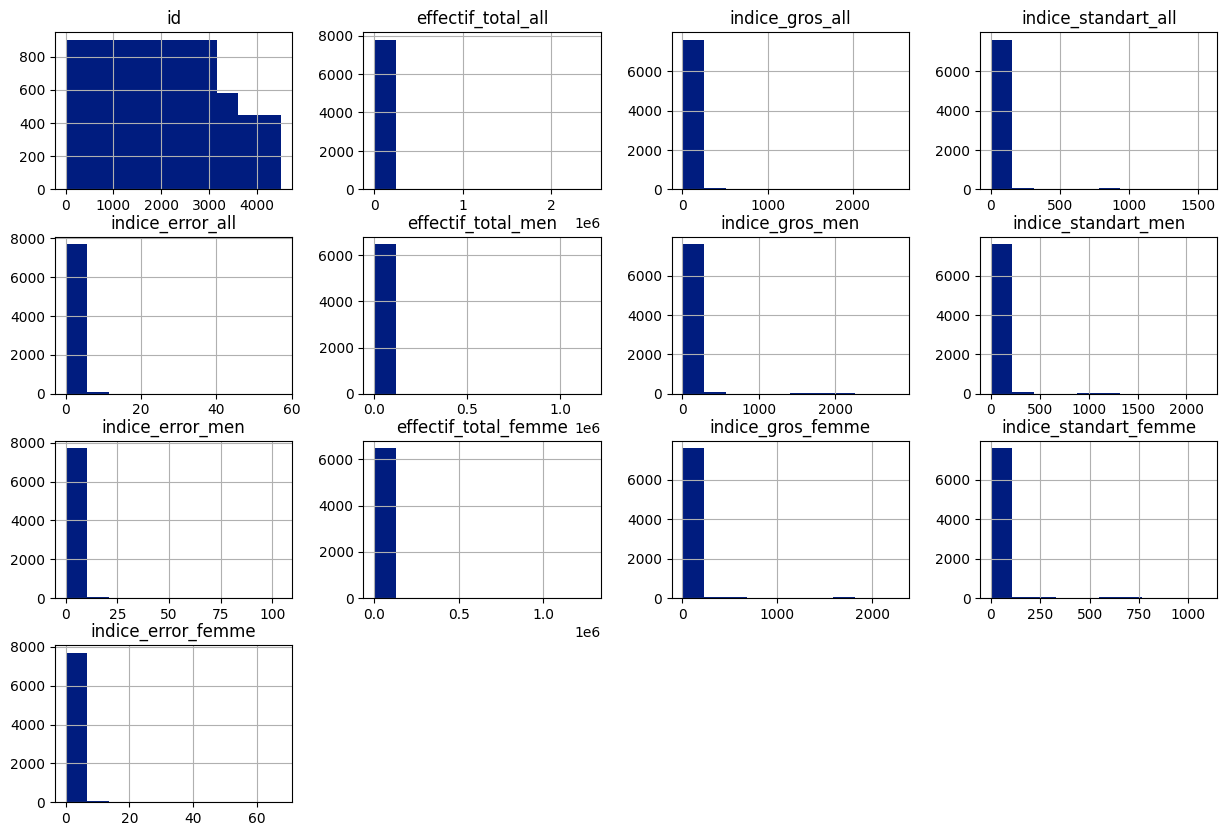

,columns,nan_percent
0,effectif_total_men,0.167180
1,effectif_total_femme,0.167180
2,district,0.094119


2024-03-01 18:35:55,282 - INFO - дубликатов не найдено


,id,reason,region,table_name,effectif_total_all,indice_gros_all,indice_standart_all,indice_error_all,effectif_total_men,indice_gros_men,indice_standart_men,indice_error_men,effectif_total_femme,indice_gros_femme,indice_standart_femme,indice_error_femme,district
0,1,заболеваемость,россия,злокачественные новообразования - всего (с00-96),580415,397.91,224.87,0.32,265039.0,391.20,255.54,0.51,315376.0,403.74,213.58,0.42,NaN
1,2,заболеваемость,центральный фо,злокачественные новообразования - всего (с00-96),148613,379.33,201.37,0.57,66290.0,367.57,221.68,0.89,82323.0,389.36,195.39,0.78,NaN
2,3,заболеваемость,белгородская область,злокачественные новообразования - всего (с00-96),7037,457.96,245.09,3.16,3290.0,462.62,275.97,4.99,3747.0,453.95,234.58,4.33,ЦЕНТРАЛЬНЫЙ ФО
3,4,заболеваемость,брянская область,злокачественные новообразования - всего (с00-96),6019,511.94,275.83,3.90,2802.0,520.43,323.50,6.37,3217.0,504.76,257.06,5.23,ЦЕНТРАЛЬНЫЙ ФО
4,5,заболеваемость,владимирская область,злокачественные новообразования - всего (с00-96),6162,462.31,236.89,3.29,2752.0,453.85,276.80,5.41,3410.0,469.37,226.49,4.53,ЦЕНТРАЛЬНЫЙ ФО
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7783,3280,смертность,забайкальский край,все причины смерти,16435,1567.51,1014.09,8.26,8382.0,1667.90,1410.40,15.86,8053.0,1475.10,741.09,9.00,ДАЛЬНЕВОСТОЧНЫЙ ФО
7784,3281,смертность,чукотский авт.округ,все причины смерти,532,1068.63,1011.62,57.25,350.0,1383.56,1306.35,104.35,182.0,743.27,745.22,67.54,ДАЛЬНЕВОСТОЧНЫЙ ФО
7785,3282,смертность,республика бурятия,все причины смерти,13445,1366.32,872.86,7.92,6950.0,1478.61,1252.97,15.46,6495.0,1263.64,618.25,8.48,ДАЛЬНЕВОСТОЧНЫЙ ФО
7786,3283,смертность,республика саха (якутия),все причины смерти,10499,1063.68,813.31,8.09,5722.0,1188.14,1094.65,14.96,4777.0,945.10,593.97,8.87,ДАЛЬНЕВОСТОЧНЫЙ ФО


In [24]:
df['region'] = df['region'].apply(lambda x: x.strip())
df['district'] = df['region'].map(region_to_district)
for column in ['indice_gros_all', 'indice_standart_all', 'indice_error_all', 
               'indice_gros_men','indice_standart_men','indice_error_men',
               'indice_gros_femme','indice_standart_femme','indice_error_femme']:
    df[column] = df[column].apply(lambda x: '0' if str(x) == 'None' else str(x).replace(',', '.')).astype(float)
process_data(df)

In [25]:
table = pd.pivot_table(df.where(df['reason'] == 'заболеваемость'),
                       aggfunc='mean',
                       values='effectif_total_all',
                       index='district',
                       columns='table_name',
                       dropna=True)
display(table)

table_name,"большие слюнные железы (с07,08)",влагалище (с52),вульва (с51),глаз и его придаточный аппарат (с69),головной мозг и другие отделы цнс (с70-72),"гортаноглотка (с12,13)",гортань (с32),губа (с00),"другие и неуточненные части полости рта (c03-06, 09)","другие лейкозы (хронический и подострый и т.д.) (с93.1-9, 94.1,3,7, 95.1-9)",...,ротоглотка (с10),соединительная и другие мягкие ткани (c47;49),тело матки (с54),тонкий кишечник (с17),"трахея, бронхи, легкое (с33,34)",шейка матки (с53),щитовидная железа (с73),"язык (с01,02)",яичко (с62),яичник (с56)
district,,,,,,,,,,,,,,,,,,,,,
ДАЛЬНЕВОСТОЧНЫЙ ФО,7.727273,3.272727,8.545455,5.363636,43.909091,6.000000,38.545455,9.545455,28.090909,4.000000,...,13.181818,18.636364,93.454545,7.000000,343.636364,113.545455,55.363636,17.090909,6.454545,68.636364
ПРИВОЛЖСКИЙ ФО,15.357143,7.214286,35.142857,16.428571,116.928571,38.285714,92.428571,38.928571,73.357143,9.357143,...,44.857143,54.142857,378.285714,25.857143,857.000000,222.857143,154.214286,50.571429,20.142857,196.857143
СЕВЕРО-ЗАПАДНЫЙ ФО,11.909091,4.545455,20.727273,10.545455,82.181818,22.181818,52.545455,9.545455,56.545455,4.909091,...,19.727273,28.090909,225.636364,16.818182,512.181818,125.636364,150.727273,36.636364,15.454545,130.181818
СЕВЕРО-КАВКАЗСКИЙ ФО,7.714286,3.142857,8.142857,6.428571,56.428571,12.714286,45.857143,18.142857,23.571429,4.857143,...,15.428571,25.285714,150.714286,10.285714,319.857143,103.857143,122.285714,18.142857,9.285714,92.000000
СИБИРСКИЙ ФО,14.600000,8.200000,21.500000,16.800000,110.000000,27.300000,85.100000,28.400000,57.800000,6.800000,...,29.000000,38.100000,296.300000,17.600000,831.100000,202.000000,140.700000,37.400000,16.800000,166.000000
УРАЛЬСКИЙ ФО,17.833333,7.333333,32.333333,17.333333,131.666667,26.500000,86.166667,28.166667,65.333333,15.000000,...,34.500000,47.000000,371.666667,28.833333,909.000000,243.500000,183.166667,44.666667,20.000000,204.000000
ЦЕНТРАЛЬНЫЙ ФО,16.888889,8.722222,30.055556,18.666667,103.222222,36.722222,84.444444,19.277778,75.000000,15.166667,...,49.888889,44.388889,423.333333,23.777778,692.000000,194.000000,180.666667,51.777778,21.388889,186.222222
ЮЖНЫЙ ФО,21.375000,7.125000,23.500000,15.625000,132.750000,25.750000,92.250000,27.500000,63.750000,6.625000,...,42.375000,48.750000,349.750000,27.875000,805.625000,238.500000,186.375000,41.875000,21.375000,185.500000


In [26]:
reason_select = widgets.Dropdown(
    options=df['reason'].unique().tolist(),
    description='Reason:',
)


column_select = widgets.Dropdown(
    options=df.columns.tolist(),
    value='effectif_total_all',
    description='Column:',
)


def on_values_selected(reason, column):
    df_slice = df[df['reason'] == reason]
    create_stat_table(df_slice[column])



widgets.interact(on_values_selected, reason=reason_select, column=column_select)

make_full_analyses_anomalies(
    df.where(df['reason'] == 'заболеваемость'),
    'effectif_total_all', 'district')


make_full_analyses_anomalies(
    df.where(df['reason'] == 'смертность'),
    'effectif_total_all', 'district')

interactive(children=(Dropdown(description='Reason:', options=('заболеваемость', 'смертность'), value='заболев…

2024-03-01 18:35:56,182 - INFO - были исключены пропуски


interactive(children=(Dropdown(description='graphs', options=('boxplot', 'detail_box_plot', 'scatterplot', 'vi…

std - 9654.85344949396
mean - 758.6096802841919
минимальное неаномальное значение 0.0 
максимальное неаномальное значение 29723.17002876607
выбросов % -  0.33


Button(button_style='info', description='Узнать больше!', style=ButtonStyle())

2024-03-01 18:35:56,546 - INFO - были исключены пропуски


interactive(children=(Dropdown(description='graphs', options=('boxplot', 'detail_box_plot', 'scatterplot', 'vi…

std - 46721.16589515365
mean - 2730.8681485992693
минимальное неаномальное значение 0.0 
максимальное неаномальное значение 142894.3658340602
выбросов % -  0.27


Button(button_style='info', description='Узнать больше!', style=ButtonStyle())

In [27]:
reason_select = widgets.Dropdown(
    options=df['reason'].unique().tolist(),
    description='Reason:',
)


def on_reason_selected(reason):
    data = df[df['reason'] == reason]
    data['ratio'] = data['effectif_total_men'] / data['effectif_total_femme']
    fig, axs = plt.subplots(3, 1, figsize=(10, 18))
    sns.histplot(data['ratio'], bins=30, kde=True, ax=axs[0])
    axs[0].set_title('Распределение соотношения мужчин и женщин')
    axs[0].set_xlabel('Соотношение мужчин и женщин')
    axs[0].set_ylabel('Частота')
    sns.boxplot(x=data['ratio'], ax=axs[1])
    axs[1].set_title('Boxplot соотношения мужчин и женщин')
    axs[1].set_xlabel('Соотношение мужчин и женщин')
    sns.violinplot(x=data['ratio'], ax=axs[2])
    axs[2].set_title('Violin plot соотношения мужчин и женщин')
    axs[2].set_xlabel('Соотношение мужчин и женщин')
    plt.tight_layout()
    plt.show()

widgets.interact(on_reason_selected, reason=reason_select)


interactive(children=(Dropdown(description='Reason:', options=('заболеваемость', 'смертность'), value='заболев…

<function __main__.on_reason_selected(reason)>

In [28]:
regions_leaders = (df.groupby(by='region')
                     .agg({'effectif_total_all': 'sum'})
                     .sort_values(by='effectif_total_all',
                                  ascending=False)[:10]['effectif_total_all']
                                  .to_list())
pprint(regions_leaders)

[4035607,
 1140372,
 875244,
 513268,
 489231,
 406734,
 361549,
 294231,
 219654,
 206037]


In [30]:
df.to_excel('tables12103.xlsx')

In [31]:
with open('illnesses.txt', 'w') as file:
    for illness in df['table_name'].unique():
        file.write(f"'{illness}', ")

In [32]:
zaeba = sqlite3.connect('data.db')


with pd.ExcelWriter('output.xlsx') as writer:
    for table in ['InSitu2021', 'urban_rural', 'State_cancer', 'State_help_57', 'TreatmentData']:
        df = pd.read_sql_query(f"SELECT * from {table}", zaeba)
        df.to_excel(writer, sheet_name=table, index=False)

zaeba.close()
